# 1. Import needed libraries

In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

img_rows, img_cols = 128, 128
input_shape = (img_rows, img_cols, 3)

#n_classes = df['category'].nunique()
n_classes = 4
print('Total number of unique categories:', n_classes)

from os import listdir, makedirs
from os.path import isfile, join, basename, splitext, isfile, exists

import numpy as np
import pandas as pd

from tqdm import tqdm_notebook

import tensorflow as tf
import keras.backend as K

import keras
from keras.models import Sequential, Model
from keras.layers import Dropout, Dense, Flatten, BatchNormalization
from keras.layers import DepthwiseConv2D, SeparableConvolution2D, Convolution2D, Conv2D,GRU, LSTM, AlphaDropout, Embedding, ZeroPadding2D,AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D, Dropout
from keras.layers import Concatenate, Average, Maximum, Bidirectional, TimeDistributed
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
#from keras.engine.input_layer import Input
from keras.models import load_model
#from keras.initializers import LecunNormal

import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('precision', 30)
np.set_printoptions(precision = 30)


#tf.set_random_seed(1090)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img

import cv2
import itertools
import pathlib
import warnings
from PIL import Image
from random import randint
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix


from tensorflow import keras
from keras import layers
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory
##from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D

from distutils.dir_util import copy_tree, remove_tree

import os
#print(os.listdir("../input/alzheimer-mri-dataset/Dataset"))
import tensorflow as tf
from keras.datasets import mnist
import cv2
import os
import pathlib
from keras.layers import Conv2D, Conv2DTranspose,Concatenate, Dropout, Dense, Reshape, LayerNormalization, LeakyReLU
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score
print("TensorFlow Version:", tf.__version__)

2024-07-28 19:52:48.776203: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 19:52:48.776341: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 19:52:48.909666: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Total number of unique categories: 4
TensorFlow Version: 2.15.0


# 2. Preprocessing

## 2.1 Load data

In [3]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [4]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [5]:
tr_df = train_df('/kaggle/input/brain-tumor-mri-dataset/Training')

In [6]:
tr_df

,Class Path,Class
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
...,...,...
5707,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5708,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5709,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5710,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma


In [7]:
ts_df = test_df('/kaggle/input/brain-tumor-mri-dataset/Testing')

In [8]:
ts_df

,Class Path,Class
0,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
...,...,...
1306,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1307,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1308,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1309,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma


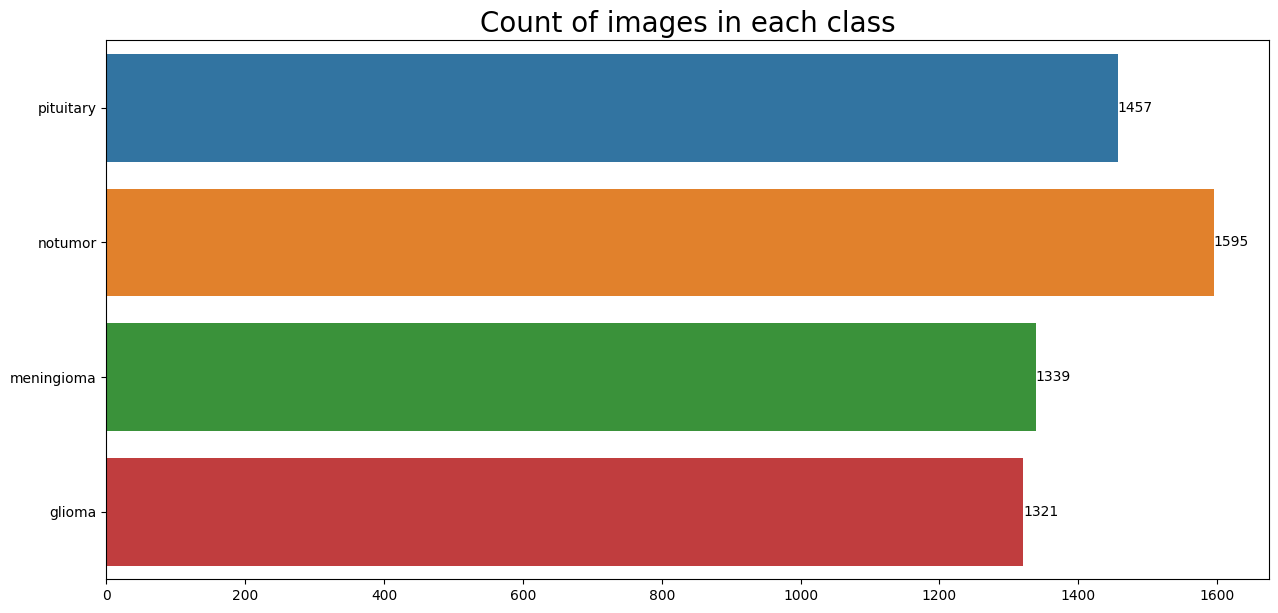

In [9]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

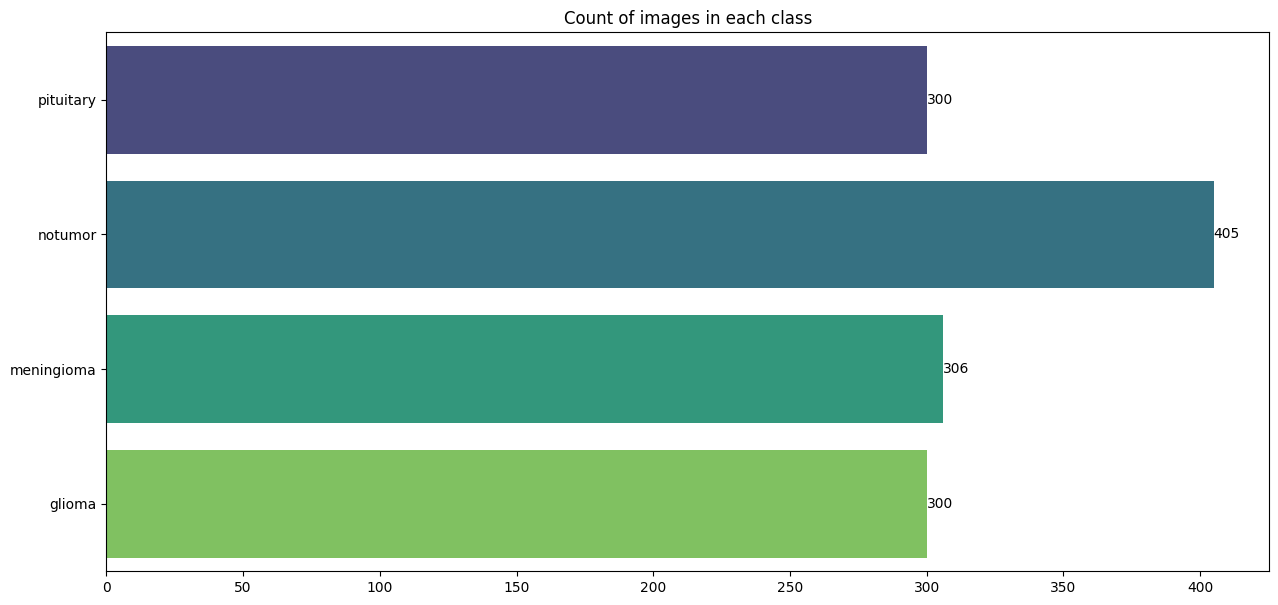

In [10]:
#Count each class in test data
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

## 2.2 Split data into train, test, valid

In [11]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [12]:
valid_df

,Class Path,Class
1297,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
723,/kaggle/input/brain-tumor-mri-dataset/Testing/...,meningioma
61,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
778,/kaggle/input/brain-tumor-mri-dataset/Testing/...,meningioma
1120,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
...,...,...
1070,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
554,/kaggle/input/brain-tumor-mri-dataset/Testing/...,notumor
1284,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
899,/kaggle/input/brain-tumor-mri-dataset/Testing/...,meningioma


## 2.3 Data preprocessing

In [13]:
batch_size = 32
img_size = (128, 128)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=5712,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=655,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=656,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


## 2.4 Getting samples from data

In [14]:
X_train, y_train = next(tr_gen)
X_train.shape, y_train.shape

((5712, 128, 128, 3), (5712, 4))

In [15]:
class ReadDataset:
    def __init__(self, datasetpath, labels, image_shape):
        self.datasetpath = datasetpath
        self.labels = labels
        self.image_shape = image_shape
    def returListImages(self,):
        self.images = []
        for label in self.labels:
            self.images.append(list(pathlib.Path(os.path.join(self.datasetpath,
                                                              label)).glob('*.*')))
    def readImages(self,):
        self.returListImages()
        self.finalImages = []
        labels = []
        for label in range(len(self.labels)):
            for img in self.images[label]:
                img = cv2.imread(str(img))
                img = cv2.resize(img , self.image_shape)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img  = img/255
                self.finalImages.append(img)
                labels.append(label)
        images = np.array(self.finalImages)
        labels = np.array(labels)
        return images, labels
import os
import pathlib
readDatasetObject = ReadDataset('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset',
                               ['Bengin cases', 'Malignant cases', 'Normal cases'],
                               (128,128))
images_train_covid_cxr, labels_train_covid_cxr = readDatasetObject.readImages()
print(images_train_covid_cxr.shape, labels_train_covid_cxr.shape)

from sklearn.model_selection import train_test_split

X_train_covid_cxr, X_test_covid_cxr, y_train_covid_cxr, y_test_covid_cxr = train_test_split(
    images_train_covid_cxr, labels_train_covid_cxr, test_size=0.3, random_state=42)

print(X_train_covid_cxr.shape, X_test_covid_cxr.shape, y_train_covid_cxr.shape, y_test_covid_cxr.shape)

from sklearn.model_selection import train_test_split

X_test_covid_cxr, X_val_covid_cxr, y_test_covid_cxr, y_val_covid_cxr = train_test_split(
    X_test_covid_cxr, y_test_covid_cxr, test_size=0.5, random_state=42)

X_test_covid_cxr.shape, X_val_covid_cxr.shape, y_test_covid_cxr.shape, y_val_covid_cxr.shape

(1097, 128, 128, 3) (1097,)
(767, 128, 128, 3) (330, 128, 128, 3) (767,) (330,)


((165, 128, 128, 3), (165, 128, 128, 3), (165,), (165,))

In [1]:
'''y_train_class_indices = y_train_covid_cxr

# Map class indices
y_train_mapped_indices = y_train_class_indices + 4

# Convert back to one-hot encoding for training (if needed)
y_train_mapped_one_hot = tf.keras.utils.to_categorical(y_train_mapped_indices)

# Print the first 10 one-hot encoded labels to verify
print("One-hot encoded mapped labels (first 10):", y_train_mapped_one_hot.shape)
y_train_mapped_indices = np.array(y_train_mapped_indices)
y_train_mapped_series = pd.Series(y_train_mapped_indices)

# Use value_counts to count unique values
value_counts = y_train_mapped_series.value_counts()

# Print the value counts
print(value_counts)

y_train1 = np.argmax(y_train, axis=1)
print(y_train1.shape)

concatenated_labels = np.concatenate((y_train1, y_train_mapped_indices))
print(concatenated_labels.shape)

concatenated_images = np.concatenate((X_train, X_train_covid_cxr))
concatenated_images.shape'''

'y_train_class_indices = y_train_covid_cxr\n\n# Map class indices\ny_train_mapped_indices = y_train_class_indices + 4\n\n# Convert back to one-hot encoding for training (if needed)\ny_train_mapped_one_hot = tf.keras.utils.to_categorical(y_train_mapped_indices)\n\n# Print the first 10 one-hot encoded labels to verify\nprint("One-hot encoded mapped labels (first 10):", y_train_mapped_one_hot.shape)\ny_train_mapped_indices = np.array(y_train_mapped_indices)\ny_train_mapped_series = pd.Series(y_train_mapped_indices)\n\n# Use value_counts to count unique values\nvalue_counts = y_train_mapped_series.value_counts()\n\n# Print the value counts\nprint(value_counts)\n\ny_train1 = np.argmax(y_train, axis=1)\nprint(y_train1.shape)\n\nconcatenated_labels = np.concatenate((y_train1, y_train_mapped_indices))\nprint(concatenated_labels.shape)\n\nconcatenated_images = np.concatenate((X_train, X_train_covid_cxr))\nconcatenated_images.shape'

In [17]:
'''random_indices = np.random.choice(6479, 6478, replace=False)
concatenated_images = concatenated_images[random_indices]
concatenated_labels = concatenated_labels[random_indices]
concatenated_images.shape, concatenated_labels.shape'''

((6478, 128, 128, 3), (6478,))

In [18]:
'''import numpy as np
import cv2

def rotate_image(image, angle):
    """
    Rotate the image by the specified angle.
    """
    center = tuple(np.array(image.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return rotated_image

def translate_image(image, tx, ty):
    """
    Translate the image by the specified translation parameters.
    """
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, image.shape[1::-1])
    return translated_image

# Example data
#X_train = np.random.rand(100, 28, 28)  # Assuming 100 images of size 28x28
#y_train = np.random.randint(0, 10, 100)  # Assuming 100 labels

# Augmentation parameters
rotation_angles = [5]
translations = [(5, 5)]

augmented_X_train = []
augmented_y_train = []

for image, label in zip(X_train, y_train):
    # Original image
    augmented_X_train.append(image)
    augmented_y_train.append(label)

    # Augment with rotations
    for angle in rotation_angles:
        rotated_image = rotate_image(image, angle)
        augmented_X_train.append(rotated_image)
        augmented_y_train.append(label)

    # Augment with translations
    for tx, ty in translations:
        translated_image = translate_image(image, tx, ty)
        augmented_X_train.append(translated_image)
        augmented_y_train.append(label)

# Convert lists to numpy arrays
augmented_X_train = np.array(augmented_X_train)
augmented_y_train = np.array(augmented_y_train)

# Shuffle the data
shuffle_indices = np.random.permutation(len(augmented_X_train))
augmented_X_train = augmented_X_train[shuffle_indices]
augmented_y_train = augmented_y_train[shuffle_indices]
augmented_X_train.shape, augmented_y_train.shape
# Now, augmented_X_train and augmented_y_train contain the augmented dataset.'''

'import numpy as np\nimport cv2\n\ndef rotate_image(image, angle):\n    """\n    Rotate the image by the specified angle.\n    """\n    center = tuple(np.array(image.shape[1::-1]) / 2)\n    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)\n    rotated_image = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)\n    return rotated_image\n\ndef translate_image(image, tx, ty):\n    """\n    Translate the image by the specified translation parameters.\n    """\n    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])\n    translated_image = cv2.warpAffine(image, translation_matrix, image.shape[1::-1])\n    return translated_image\n\n# Example data\n#X_train = np.random.rand(100, 28, 28)  # Assuming 100 images of size 28x28\n#y_train = np.random.randint(0, 10, 100)  # Assuming 100 labels\n\n# Augmentation parameters\nrotation_angles = [5]\ntranslations = [(5, 5)]\n\naugmented_X_train = []\naugmented_y_train = []\n\nfor image, label in zip(X_t

In [19]:
random_indices = np.random.choice(5712, 766, replace=False)
augmented_X_train = X_train[random_indices]
augmented_y_train = y_train[random_indices]
augmented_X_train.shape, augmented_y_train.shape

((766, 128, 128, 3), (766, 4))

In [20]:
#X_train_covid_cxr.shape, X_test_covid_cxr.shape, y_train_covid_cxr.shape, y_test_covid_cxr.shape

y_train = np.concatenate((y_train,augmented_y_train), axis=0)
X_train = np.concatenate((X_train, augmented_X_train), axis=0)
X_train.shape, y_train.shape

((6478, 128, 128, 3), (6478, 4))

In [21]:
import numpy as np
import cv2

def rotate_image(image, angle):
    """
    Rotate the image by the specified angle.
    """
    center = tuple(np.array(image.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return rotated_image

def translate_image(image, tx, ty):
    """
    Translate the image by the specified translation parameters.
    """
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, image.shape[1::-1])
    return translated_image

# Example data
#X_train = np.random.rand(100, 28, 28)  # Assuming 100 images of size 28x28
#y_train = np.random.randint(0, 10, 100)  # Assuming 100 labels

# Augmentation parameters
rotation_angles = [5]
translations = [(5, 5)]

augmented_X_train = []
augmented_y_train = []

for image, label in zip(X_train_covid_cxr, y_train_covid_cxr):
    # Original image
    augmented_X_train.append(image)
    augmented_y_train.append(label)

    # Augment with rotations
    for angle in rotation_angles:
        rotated_image = rotate_image(image, angle)
        augmented_X_train.append(rotated_image)
        augmented_y_train.append(label)

    # Augment with translations
    for tx, ty in translations:
        translated_image = translate_image(image, tx, ty)
        augmented_X_train.append(translated_image)
        augmented_y_train.append(label)

# Convert lists to numpy arrays
augmented_X_train = np.array(augmented_X_train)
augmented_y_train = np.array(augmented_y_train)

# Shuffle the data
shuffle_indices = np.random.permutation(len(augmented_X_train))
augmented_X_train = augmented_X_train[shuffle_indices]
augmented_y_train = augmented_y_train[shuffle_indices]
augmented_X_train.shape, augmented_y_train.shape
# Now, augmented_X_train and augmented_y_train contain the augmented dataset.

((2301, 128, 128, 3), (2301,))

In [22]:
#X_train_covid_cxr.shape, X_test_covid_cxr.shape, y_train_covid_cxr.shape, y_test_covid_cxr.shape

labels_train_covid_cxr = np.concatenate((augmented_y_train,augmented_y_train, augmented_y_train), axis=0)
images_train_covid_cxr = np.concatenate((augmented_X_train, augmented_X_train, augmented_X_train), axis=0)
images_train_covid_cxr.shape, labels_train_covid_cxr.shape



((6903, 128, 128, 3), (6903,))

In [23]:
random_indices = np.random.choice(6903, 6478, replace=False)
images_train_covid_cxr = images_train_covid_cxr[random_indices]
labels_train_covid_cxr = labels_train_covid_cxr[random_indices]
images_train_covid_cxr.shape, labels_train_covid_cxr.shape

((6478, 128, 128, 3), (6478,))

In [24]:
X_val, y_val = next(valid_gen)
X_val.shape, y_val.shape

((655, 128, 128, 3), (655, 4))

In [26]:
random_indices = np.random.choice(820, 800, replace=False)
concatenated_val_images1 = concatenated_val_images[random_indices]
concatenated_val_labels1 = concatenated_val_labels[random_indices]
concatenated_val_images1.shape, concatenated_val_labels1.shape

((800, 128, 128, 3), (800, 7))

In [27]:
#X_train_covid_cxr.shape, X_test_covid_cxr.shape, y_train_covid_cxr.shape, y_test_covid_cxr.shape

concatenated_val_labels = np.concatenate((concatenated_val_labels, concatenated_val_labels1), axis=0)
concatenated_val_images = np.concatenate((concatenated_val_images, concatenated_val_images1), axis=0)
concatenated_val_images.shape, concatenated_val_labels.shape

((1620, 128, 128, 3), (1620, 7))

In [28]:
#X_train_covid_cxr.shape, X_test_covid_cxr.shape, y_train_covid_cxr.shape, y_test_covid_cxr.shape

X_val = np.concatenate((X_val, X_val, X_val), axis=0)
y_val = np.concatenate((y_val, y_val, y_val), axis=0)
X_val.shape, y_val.shape

((1965, 128, 128, 3), (1965, 4))

In [29]:
random_indices = np.random.choice(1965, 1620, replace=False)
X_val = X_val[random_indices]
y_val = y_val[random_indices]
X_val.shape, y_val.shape

((1620, 128, 128, 3), (1620, 4))

In [30]:
#X_val_covid_cxr

#X_train_covid_cxr.shape, X_test_covid_cxr.shape, y_train_covid_cxr.shape, y_test_covid_cxr.shape

X_val_covid_cxr = np.concatenate((X_val_covid_cxr, X_val_covid_cxr, X_val_covid_cxr, X_val_covid_cxr, X_val_covid_cxr), axis=0)
y_val_covid_cxr = np.concatenate((y_val_covid_cxr, y_val_covid_cxr, y_val_covid_cxr, y_val_covid_cxr, y_val_covid_cxr), axis=0)
X_val_covid_cxr.shape, y_val_covid_cxr.shape

((825, 128, 128, 3), (825,))

In [31]:
#X_val_covid_cxr

#X_train_covid_cxr.shape, X_test_covid_cxr.shape, y_train_covid_cxr.shape, y_test_covid_cxr.shape

X_val_covid_cxr = np.concatenate((X_val_covid_cxr, X_val_covid_cxr), axis=0)
y_val_covid_cxr = np.concatenate((y_val_covid_cxr, y_val_covid_cxr), axis=0)
X_val_covid_cxr.shape, y_val_covid_cxr.shape

((1650, 128, 128, 3), (1650,))

In [32]:
random_indices = np.random.choice(1650, 1620, replace=False)
X_val_covid_cxr = X_val_covid_cxr[random_indices]
y_val_covid_cxr = y_val_covid_cxr[random_indices]
X_val_covid_cxr.shape, y_val_covid_cxr.shape

((1620, 128, 128, 3), (1620,))